In [1]:
#Import all the useful Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas.api.types as ptypes
from datetime import datetime
import dateutil.parser

from sklearn.impute import SimpleImputer

from sklearn.linear_model import LinearRegression
from sklearn import metrics
# The command below means that the output of multiple commands in a cell will be output at once
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# The command below tells jupyter to display up to 100 columns, this keeps everything visible
pd.set_option('display.max_columns', 100)
pd.set_option('expand_frame_repr', True)

# Show figures in notebook
%matplotlib inline

In [2]:
#Reading data in csv
df=pd.read_csv('listings.csv')

C:\Users\Anish\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (43,94) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,...,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,5570,https://www.airbnb.com/rooms/5570,20191121092222,2019-11-21,Ocean front condo on the sand,Missionbeachretreat. Great Ocean Front Condo...,This charming two bedroom beachfront condomini...,Missionbeachretreat. Great Ocean Front Condo...,none,While some may compare San Diego’s Mission Bea...,NaN,Bus #8 goes to La Jolla and Old Town transit c...,"2 Bedrooms (1 Queen, 2 Twins) 1 Bath Balcony ...",Once reservation is made I will call guest. I...,"Min 4 nights winter. 7 nights Spring Break, l...",NaN,NaN,https://a0.muscache.com/im/pictures/d3342744-1...,NaN,8435,https://www.airbnb.com/users/show/8435,Jef Karchin,2009-02-23,"San Diego, California, United States","Real estate broker, Jef Karchin real estate ...",within a few hours,100%,NaN,f,https://a0.muscache.com/im/users/8435/profile_...,https://a0.muscache.com/im/users/8435/profile_...,Mission Beach,3.0,3.0,"['email', 'phone', 'kba']",t,t,"San Diego, CA, United States",Mission Beach,Mission Bay,NaN,San Diego,CA,92109,San Diego,"San Diego, CA",US,United States,32.78430,-117.25258,...,4.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Free par...",850.0,"$2,050.00",NaN,NaN,$500.00,$150.00,1,$0.00,3,365,3,3,365,365,3.0,365.0,2 months ago,t,12,20,31,176,2019-11-21,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,"{""SAN DIEGO"","" SAN DIEGO TOURISM MARKETING DIS...",f,f,strict_14_with_grace_period,f,f,2,2,0,0,NaN
1,8488,https://www.airbnb.com/rooms/8488,20191121092222,2019-11-21,Juniper Zen Palace- SD's Best Hood!,Walk every where in San Diegos most charming a...,Private craftsman home in the heart of Histori...,Walk every where in San Diegos most charming a...,none,South Park is a charming community and our nei...,we have no cable tv. just streaming services. ...,bus route to downtown is 1/2 block away!,backyard,NaN,"• Check-in time is 3PM. We are fun, easygoing ...",NaN,NaN,https://a0.muscache.com/im/pictures/b1f12e62-1...,NaN,25186,https://www.airbnb.com/users/show/25186,Helene,2009-07-10,"Los Angeles, California, United States",HI! I am a photographer on tour. I have severa...,within an hour,100%,NaN,f,https://a0.muscache.com/im/pictures/user/b83cc...,https://a0.muscache.com/im/pictures/user/b83cc...,Burlingame,4.0,4.0,"['email', 'phone', 'facebook', 'reviews', 'off...",t,t,"San Diego, CA, United States",South Park,South Park,NaN,San Dieg

In [4]:
#Looking at the rows and colums in the dataset respectively
df.shape

(13574, 106)

In [5]:
#Check for duplicate terms
df.duplicated().sum()
df.drop_duplicates(inplace=True)

0

In [6]:
df.isnull().sum()

id                                                 0
listing_url                                        0
scrape_id                                          0
last_scraped                                       0
name                                               0
                                                ... 
calculated_host_listings_count                     0
calculated_host_listings_count_entire_homes        0
calculated_host_listings_count_private_rooms       0
calculated_host_listings_count_shared_rooms        0
reviews_per_month                               2178
Length: 106, dtype: int64

In [7]:
df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,...,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,5570,https://www.airbnb.com/rooms/5570,20191121092222,2019-11-21,Ocean front condo on the sand,Missionbeachretreat. Great Ocean Front Condo...,This charming two bedroom beachfront condomini...,Missionbeachretreat. Great Ocean Front Condo...,none,While some may compare San Diego’s Mission Bea...,NaN,Bus #8 goes to La Jolla and Old Town transit c...,"2 Bedrooms (1 Queen, 2 Twins) 1 Bath Balcony ...",Once reservation is made I will call guest. I...,"Min 4 nights winter. 7 nights Spring Break, l...",NaN,NaN,https://a0.muscache.com/im/pictures/d3342744-1...,NaN,8435,https://www.airbnb.com/users/show/8435,Jef Karchin,2009-02-23,"San Diego, California, United States","Real estate broker, Jef Karchin real estate ...",within a few hours,100%,NaN,f,https://a0.muscache.com/im/users/8435/profile_...,https://a0.muscache.com/im/users/8435/profile_...,Mission Beach,3.0,3.0,"['email', 'phone', 'kba']",t,t,"San Diego, CA, United States",Mission Beach,Mission Bay,NaN,San Diego,CA,92109,San Diego,"San Diego, CA",US,United States,32.78430,-117.25258,...,4.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Free par...",850.0,"$2,050.00",NaN,NaN,$500.00,$150.00,1,$0.00,3,365,3,3,365,365,3.0,365.0,2 months ago,t,12,20,31,176,2019-11-21,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,"{""SAN DIEGO"","" SAN DIEGO TOURISM MARKETING DIS...",f,f,strict_14_with_grace_period,f,f,2,2,0,0,NaN
1,8488,https://www.airbnb.com/rooms/8488,20191121092222,2019-11-21,Juniper Zen Palace- SD's Best Hood!,Walk every where in San Diegos most charming a...,Private craftsman home in the heart of Histori...,Walk every where in San Diegos most charming a...,none,South Park is a charming community and our nei...,we have no cable tv. just streaming services. ...,bus route to downtown is 1/2 block away!,backyard,NaN,"• Check-in time is 3PM. We are fun, easygoing ...",NaN,NaN,https://a0.muscache.com/im/pictures/b1f12e62-1...,NaN,25186,https://www.airbnb.com/users/show/25186,Helene,2009-07-10,"Los Angeles, California, United States",HI! I am a photographer on tour. I have severa...,within an hour,100%,NaN,f,https://a0.muscache.com/im/pictures/user/b83cc...,https://a0.muscache.com/im/pictures/user/b83cc...,Burlingame,4.0,4.0,"['email', 'phone', 'facebook', 'reviews', 'off...",t,t,"San Diego, CA, United States",South Park,South Park,NaN,San Dieg

In [8]:
df.isnull().sum()

id                                                 0
listing_url                                        0
scrape_id                                          0
last_scraped                                       0
name                                               0
                                                ... 
calculated_host_listings_count                     0
calculated_host_listings_count_entire_homes        0
calculated_host_listings_count_private_rooms       0
calculated_host_listings_count_shared_rooms        0
reviews_per_month                               2178
Length: 106, dtype: int64

In [9]:
#Checking in dataset the number of columns having Greater than 60%  missing values and less than 60% 
nacounts = df.isna().sum()
less_than_60 = list(nacounts[nacounts.sort_values() < df.shape[0]*0.6].index)
greater_than_60 = list(nacounts[nacounts.sort_values() > df.shape[0]*0.6].index)
print(len(less_than_60))
print(len(greater_than_60))

97
9


In [10]:
#Considering only the columns or features having less than 60% missing values
new_df = df[nacounts[nacounts.sort_values() < df.shape[0]*0.6].index]

In [11]:
new_df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,5570,https://www.airbnb.com/rooms/5570,20191121092222,2019-11-21,Ocean front condo on the sand,Missionbeachretreat. Great Ocean Front Condo...,This charming two bedroom beachfront condomini...,Missionbeachretreat. Great Ocean Front Condo...,none,While some may compare San Diego’s Mission Bea...,NaN,Bus #8 goes to La Jolla and Old Town transit c...,"2 Bedrooms (1 Queen, 2 Twins) 1 Bath Balcony ...",Once reservation is made I will call guest. I...,"Min 4 nights winter. 7 nights Spring Break, l...",https://a0.muscache.com/im/pictures/d3342744-1...,8435,https://www.airbnb.com/users/show/8435,Jef Karchin,2009-02-23,"San Diego, California, United States","Real estate broker, Jef Karchin real estate ...",within a few hours,100%,f,https://a0.muscache.com/im/users/8435/profile_...,https://a0.muscache.com/im/users/8435/profile_...,Mission Beach,3.0,3.0,"['email', 'phone', 'kba']",t,t,"San Diego, CA, United States",Mission Beach,Mission Bay,San Diego,CA,92109,San Diego,"San Diego, CA",US,United States,32.78430,-117.25258,t,Condominium,Entire home/apt,6,1.0,2.0,4.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Free par...","$2,050.00",$500.00,$150.00,1,$0.00,3,365,3,3,365,365,3.0,365.0,2 months ago,t,12,20,31,176,2019-11-21,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,"{""SAN DIEGO"","" SAN DIEGO TOURISM MARKETING DIS...",f,f,strict_14_with_grace_period,f,f,2,2,0,0,NaN
1,8488,https://www.airbnb.com/rooms/8488,20191121092222,2019-11-21,Juniper Zen Palace- SD's Best Hood!,Walk every where in San Diegos most charming a...,Private craftsman home in the heart of Histori...,Walk every where in San Diegos most charming a...,none,South Park is a charming community and our nei...,we have no cable tv. just streaming services. ...,bus route to downtown is 1/2 block away!,backyard,NaN,"• Check-in time is 3PM. We are fun, easygoing ...",https://a0.muscache.com/im/pictures/b1f12e62-1...,25186,https://www.airbnb.com/users/show/25186,Helene,2009-07-10,"Los Angeles, California, United States",HI! I am a photographer on tour. I have severa...,within an hour,100%,f,https://a0.muscache.com/im/pictures/user/b83cc...,https://a0.muscache.com/im/pictures/user/b83cc...,Burlingame,4.0,4.0,"['email', 'phone', 'facebook', 'reviews', 'off...",t,t,"San Diego, CA, United States",South Park,South Park,San Diego,CA,92104,San Diego,"San Diego, CA",US,United States,32.72839,-117.12824,t,House,Entire 

In [12]:
print(greater_than_60)

['thumbnail_url', 'medium_url', 'xl_picture_url', 'host_acceptance_rate', 'neighbourhood_group_cleansed', 'square_feet', 'weekly_price', 'monthly_price', 'license']


In [13]:
print(less_than_60)

['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary', 'space', 'description', 'experiences_offered', 'neighborhood_overview', 'notes', 'transit', 'access', 'interaction', 'house_rules', 'picture_url', 'host_id', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'street', 'neighbourhood', 'neighbourhood_cleansed', 'city', 'state', 'zipcode', 'market', 'smart_location', 'country_code', 'country', 'latitude', 'longitude', 'is_location_exact', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'price', 'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nigh

In [14]:
#Which other columns has missing values from the less than 60% missing data
missing_col_list = list(new_df.columns[new_df.isnull().any()])
print(missing_col_list)

['summary', 'space', 'description', 'neighborhood_overview', 'notes', 'transit', 'access', 'interaction', 'house_rules', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood', 'state', 'zipcode', 'market', 'bathrooms', 'bedrooms', 'beds', 'security_deposit', 'cleaning_fee', 'first_review', 'last_review', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'jurisdiction_names', 'reviews_per_month']


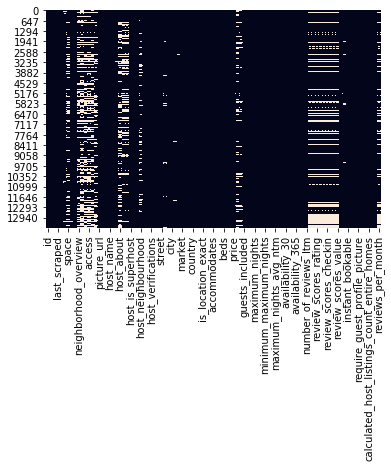

In [15]:
#Heat map showing the visualization image of missing values belows in white for the columns as shown in x-axis
#missingdata_df = new_df.columns[new_df.isnull().any()].tolist()
sns.heatmap(new_df.isnull(), cbar=False)

In [16]:
#Total columns that has missing values
print(len(missing_col_list))

43


Columns that need to be removed - has missing values and are categorical
summary, space, description , neighborhood_overview , notes , transit , access , interaction , house_rules , host_name , host_about , host_response_time , host_thumbnail_url', 'host_picture_url', 'host_has_profile_pic , host_identity_verified , first_review, last_review , jurisdiction_names ,  

## RQ2) Which Services or Information about the room can be ignored for predicting the price❓


In [17]:
#Dropping the columns consisting of Text Data
new_df = new_df.drop(columns=['summary', 'space', 'description' , 'neighborhood_overview' , 'notes' , 'transit' , 'access' , 'interaction' , 'house_rules' , 'host_name' , 'host_about' , 'host_response_time' , 'host_thumbnail_url', 'host_picture_url', 'host_has_profile_pic' , 'host_identity_verified' , 'first_review' , 'last_review' , 'jurisdiction_names', 'host_since', 'host_neighbourhood' , 'neighbourhood','calendar_updated','calendar_last_scraped','requires_license','is_business_travel_ready','listing_url','scrape_id','last_scraped','name','picture_url','host_url','host_location','host_verifications','street','neighbourhood_cleansed','state','market','smart_location','country','experiences_offered','id','host_id','experiences_offered','zipcode'])

In [18]:
new_df.shape

(13574, 53)

In [19]:
#Checking the missing column list which contains missing values
missing_col_list = list(new_df.columns[new_df.isnull().any()])
print(missing_col_list)

['host_response_rate', 'host_is_superhost', 'host_listings_count', 'host_total_listings_count', 'bathrooms', 'bedrooms', 'beds', 'security_deposit', 'cleaning_fee', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'reviews_per_month']


In [20]:
#Total columns that has missing values remaining
print(len(missing_col_list))

17


Missing Values Imputation
#host_location
#host_response_rate
#state
#zipcode

#host_listings_count  = 0
#host_total_listings_count  = 0
#host_is_superhost =  max
#market = San Diego

#Average
#bathrooms                       4
#bedrooms                         15
#beds                             17
#security_deposit               2706
#cleaning_fee                   1485
#review_scores_rating           2304
#review_scores_accuracy         2308
#review_scores_cleanliness      2306
#review_scores_checkin          2317
#review_scores_communication    2308
#review_scores_location         2317
#review_scores_value            2319


In [21]:
#Checking the datatype of the columns
values=['bathrooms','bedrooms','beds','security_deposit','cleaning_fee','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value']
new_df[values].dtypes

bathrooms                      float64
bedrooms                       float64
beds                           float64
security_deposit                object
cleaning_fee                    object
review_scores_rating           float64
review_scores_accuracy         float64
review_scores_cleanliness      float64
review_scores_checkin          float64
review_scores_communication    float64
review_scores_location         float64
review_scores_value            float64
dtype: object

In [22]:
#Remove $ sign from the column and convert into float
new_df['security_deposit'] = new_df['security_deposit'].str.replace(r'\D', '').astype(float)

In [23]:
#Remove $ sign from the column and convert into float
new_df['cleaning_fee'] = new_df['cleaning_fee'].str.replace(r'\D', '').astype(float)


In [24]:
#Remove $ sign from the column and convert into float
new_df['price'] = new_df['price'].str.replace(r'\D', '').astype(float)

In [25]:
#Remove % sign from the column and convert into float
new_df['extra_people'] = new_df['extra_people'].str.replace(r'\D', '').astype(float)

In [26]:
#Remove % sign from the column and convert into float
new_df['host_response_rate'] = new_df['host_response_rate'].str.replace(r'\D', '').astype(float)

In [27]:
#new_df['zipcode'] = new_df['zipcode'].str.replace(r'\D', '').astype(float)

In [28]:
new_df[values].dtypes

bathrooms                      float64
bedrooms                       float64
beds                           float64
security_deposit               float64
cleaning_fee                   float64
review_scores_rating           float64
review_scores_accuracy         float64
review_scores_cleanliness      float64
review_scores_checkin          float64
review_scores_communication    float64
review_scores_location         float64
review_scores_value            float64
dtype: object

In [29]:
#Filling the missing values with the means values for particular columns in their rows where data is missing
values=['bathrooms','bedrooms','beds','review_scores_rating', 'reviews_per_month']
for i in values:
    mean_values = round(new_df[i].mean())
    new_df[i].fillna(mean_values, inplace=True)  

In [30]:
#Dropping columns due to multicollinearity and similar values and also data that is unnecessary(latitude,longitude)
new_df.drop(['review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value','minimum_minimum_nights','maximum_minimum_nights','minimum_maximum_nights','maximum_maximum_nights','minimum_nights_avg_ntm','maximum_nights_avg_ntm','number_of_reviews_ltm','latitude','longitude'],axis=1,inplace=True)

In [31]:
#Imputing cleaning fee using Simple Imputer
imputer=SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer.fit(new_df['cleaning_fee'].values.reshape(-1, 1))
new_df['cleaning_fee'] = imputer.transform(new_df['cleaning_fee'].values.reshape(-1, 1))

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='most_frequent', verbose=0)

In [32]:
#Imputing security deposit using Simple Imputer
imputer.fit(new_df['security_deposit'].values.reshape(-1, 1))
new_df['security_deposit'] = imputer.transform(new_df['security_deposit'].values.reshape(-1, 1))

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='most_frequent', verbose=0)

In [33]:
new_df = new_df.dropna(subset = ['host_response_rate'], how='any', axis=0)

In [34]:
new_df.isnull().sum()

host_response_rate                              0
host_is_superhost                               0
host_listings_count                             0
host_total_listings_count                       0
city                                            0
country_code                                    0
is_location_exact                               0
property_type                                   0
room_type                                       0
accommodates                                    0
bathrooms                                       0
bedrooms                                        0
beds                                            0
bed_type                                        0
amenities                                       0
price                                           0
security_deposit                                0
cleaning_fee                                    0
guests_included                                 0
extra_people                                    0


In [35]:
#Fill host_listings_count with value =0
#Fill host_total_listings_count with value =0
#host_is_superhost =  mode
#market = San Diego
new_df['host_listings_count'].fillna(0, inplace=True)
new_df['host_total_listings_count'].fillna(0, inplace=True)

In [36]:
#Fill host_is_superhost with mode value in the column
mode_value = new_df['host_is_superhost'].mode()
new_df['host_is_superhost'].fillna(mode_value, inplace=True)  

In [37]:
missing_col_list = list(new_df.columns[new_df.isnull().any()])
print(len(missing_col_list))

0


In [38]:
#Numerical columns in the data
for col in new_df.columns:
    if len(new_df[col].value_counts()) == 2 and 1 in new_df[col] \
       or col.find("_id") > -1 or col.find("id") > -1: 
        new_df[col] = new_df[col].astype("category")
    

In [39]:
numeric_cols = [col for col in new_df.columns if ptypes.is_numeric_dtype(new_df[col])]
print(numeric_cols)

['host_response_rate', 'host_listings_count', 'host_total_listings_count', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price', 'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights', 'maximum_nights', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'number_of_reviews', 'review_scores_rating', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms', 'reviews_per_month']


In [40]:
dfnums = new_df[numeric_cols]
cor = dfnums.corr()

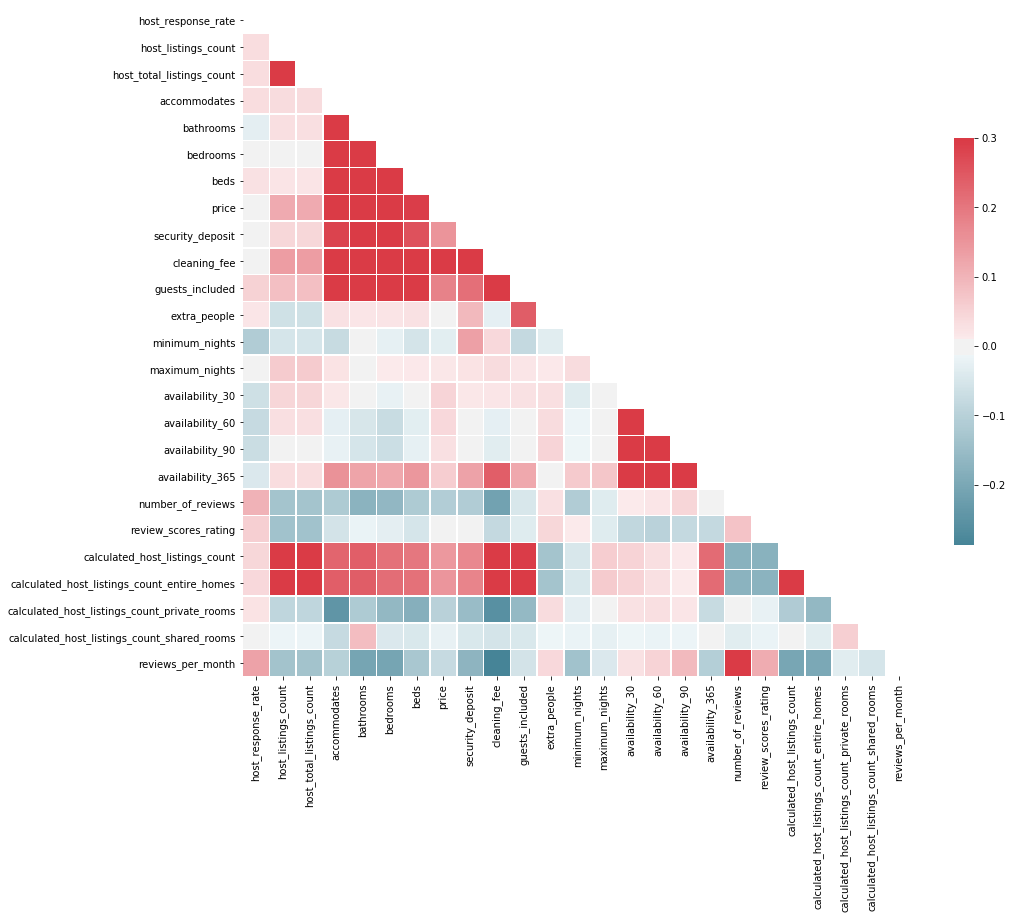

In [41]:
#Correlation visualization using heatmap
mask = np.triu(np.ones_like(cor, dtype=np.bool))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

f, ax = plt.subplots(figsize=(15, 15))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(cor, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [42]:
#Performing Data Transformation on the categorical variables

In [43]:
convert_to_0_1 = lambda x: 1 if x=='t' else 0
new_df['instant_bookable'] = new_df['instant_bookable'].apply(convert_to_0_1)
new_df['instant_bookable'] = new_df['instant_bookable'].astype(int)

In [44]:
new_df['require_guest_profile_picture'] = new_df['require_guest_profile_picture'].apply(convert_to_0_1)
new_df['require_guest_profile_picture'] = new_df['require_guest_profile_picture'].astype(int)

In [45]:
new_df['is_location_exact'] = new_df['is_location_exact'].apply(convert_to_0_1)
new_df['is_location_exact'] = new_df['is_location_exact'].astype(int)

In [46]:
new_df['host_is_superhost'] = new_df['host_is_superhost'].apply(convert_to_0_1)
new_df['host_is_superhost'] = new_df['host_is_superhost'].astype(int)

In [47]:
new_df['has_availability'] = new_df['has_availability'].apply(convert_to_0_1)
new_df['has_availability'] = new_df['has_availability'].astype(int)

In [48]:
change_name_San_Deigo = lambda x: 'San Diego' if x=='Ocean Beach' or x=='San Diego' or x=='Ocean Beach, San Diego' or x=='San Deigo' or x=='San Diego County' or x=='San Diego, California, US' or x=='Gas lamp San Diego' or x=='SAN DIEGO' or x=='San DIego' or x=='San Diego ' or x==' San Diego' else x
new_df['city'] = new_df['city'].apply(change_name_San_Deigo)

In [49]:
change_name_Mission = lambda x: 'Mission Bay' if x=='Mission Beach' else x
new_df['city'] = new_df['city'].apply(change_name_Mission)

In [50]:
change_name_La = lambda x: 'La Jolla ' if x=='La Jolla Cove' or x=='LA JOLLA' or x=='La Jolla '  else x
new_df['city'] = new_df['city'].apply(change_name_La)

In [51]:
change_name_Del = lambda x: 'Del Mar' if x=='Del Mar Highlands ' else x
new_df['city'] = new_df['city'].apply(change_name_Del)

In [52]:
change_name_Chal = lambda x: 'Chula Vista' if x=='Chula Vista ' else x
new_df['city'] = new_df['city'].apply(change_name_Chal)

In [53]:
x=[]
for i in new_df['amenities']:
    x.append(len(i))

In [54]:
new_df['len_amenities']=pd.Series(x).values

In [55]:
basic_amenities = lambda x: 1 if x<400 else 0
new_df['basic_amenities'] = new_df['len_amenities'].apply(basic_amenities)

In [56]:
#Grouping different property types
dict1 = {'Apartment':['Condominium','Timeshare','Loft','Serviced apartment','Guest suite'],
         'House':['Vacation home','Villa','Townhouse','In-law','Casa particular (Cuba)','Guesthouse','Cottage','Dome house'],
         'Hotel1':['Dorm','Hostel','Guesthouse','Aparthotel','Nature lodge'],
         'Hotel2':['Hotel','Boutique hotel','Bed and breakfast'],
         'Other':['Island','Castle','Yurt','Hut','Chalet','Treehouse',
                  'Earth House','Tipi','Cave','Train','Parking Space','Lighthouse',
                 'Tent','Boat','Cabin','Camper/RV','Bungalow','Tiny house','Resort','Bus','Igloo','Campsite','Barn','Farm stay']
        }

In [57]:
dict2 = {i : k for k, v in dict1.items() for i in v}
new_df['property_type'].replace(dict2,inplace=True)

In [58]:
new_df['cancellation_policy'].value_counts()

strict_14_with_grace_period    5298
moderate                       2965
flexible                       1916
super_strict_60                 555
super_strict_30                 126
luxury_moderate                   6
strict                            1
Name: cancellation_policy, dtype: int64

In [59]:
#Grouping different cancellation policies
strictness = {'strict':['strict_14_with_grace_period','super_strict_60','super_strict_30'],
         'moderate':['luxury_moderate','Villa','Townhouse','In-law','Casa particular (Cuba)','Guesthouse','Cottage','Dome house'],
         'flexible':['flexible']}

In [60]:
strict2 = {i : k for k, v in strictness.items() for i in v}
new_df['cancellation_policy'].replace(strict2,inplace=True)

In [61]:
new_df

,host_response_rate,host_is_superhost,host_listings_count,host_total_listings_count,city,country_code,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,len_amenities,basic_amenities
0,100.0,0,3.0,3.0,San Diego,US,1,Apartment,Entire home/apt,6,1.0,2.0,4.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Free par...",205000.0,50000.0,15000.0,1,0.0,3,365,1,12,20,31,176,0,95.0,0,strict,0,f,2,2,0,0,2.00,370,1
1,100.0,0,4.0,4.0,San Diego,US,1,House,Entire home/apt,5,2.0,3.0,3.0,Real Bed,"{TV,Internet,Wifi,Kitchen,""Free parking on pre...",22500.0,30000.0,17500.0,4,5000.0,3,1125,1,6,20,42,218,40,97.0,0,strict,1,t,2,2,0,0,0.36,558,0
2,100.0,0,6.0,6.0,San Diego,US,1,Other,Entire home/apt,8,2.0,2.0,3.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Free par...",22500.0,25000.0,8000.0,6,1500.0,4,365,1,0,0,0,234,60,98.0,0,moderate,0,f,5,5,0,0,0.53,372,1
3,100.0,0,3.0,3.0,San Diego,US,1,House,Private room,1,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",7500.0,10000.0,1600.0,1,1000.0,1,21,1,0,1,31,306,143,86.0,0,moderate,1,t,3,0,3,0,1.28,496,0
4,100.0,1,1.0,1.0,San Diego,US,1,Other,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{Internet,Wifi,Pool,Kitchen,""Pets live on this...",7400.0,0.0,2500.0,1,0.0,3,7,1,16,37,61,319,384,98.0,0,strict,1,f,1,1,0,0,3.38,514,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13566,100.0,1,5.0,5.0,San Diego,US,1,House,Entire home/apt,4,2.0,2.0,3.0,Real Bed,"{Internet,Wifi,""Air conditioning"",Kitchen,""Fre...",52900.0,0.0,0.0,4,0.0,3,1125,1,20,40,67,331,0,95.0,1,strict,0,f,5,5,0,0,2.00,286,1
13567,100.0,1,5.0,5.0,San Diego,US,1,House,Entire home/apt,8,2.0,3.0,5.0,Real Bed,"{Internet,Wifi,""Air conditioning"",""Free parkin...",67900.0,0.0,0.0,8,0.0,3,1125,1,14,25,55,296,0,95.0,1,strict,0,f,5,5,0,0,2.00,145,1
13568,99.0,0,408.0,408.0,La Jolla,US,0,House,Entire home/apt,12,6.5,5.0,6.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",344300.0,100000.0,0.0,12,0.0,1,1125,1,0,0,0,0,0,95.0,1,strict,0,f,189,189,0,0,2.00,249,1
13572,91.0,0,0.0,0.0,San Diego,US,1,Apartment,Entire home/apt,2,1.0,1.0,0.0,Real Bed,"{TV,""Cable TV"",Wifi,""Air conditioning"",Kitchen...",7200.0,0.0,4000.0,1,0.0,2,1125,1,21,51,81,81,0,95.0,1,flexible,0,f,2,2,0,0,2.00,460,0


## RQ1) Which all Services or Information affects the price of Airbnb Rooms in San Diego❓


In [62]:
new_df.columns

Index(['host_response_rate', 'host_is_superhost', 'host_listings_count',
       'host_total_listings_count', 'city', 'country_code',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'price',
       'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people',
       'minimum_nights', 'maximum_nights', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'review_scores_rating',
       'instant_bookable', 'cancellation_policy',
       'require_guest_profile_picture', 'require_guest_phone_verification',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month',
       'len_amenities', 'basic_amenities'],
      dtype='object')

In [63]:
#Creating dummy variables
property_type = pd.get_dummies(new_df['property_type'],drop_first=True)
room_type = pd.get_dummies(new_df['room_type'],drop_first=True)
bed_type = pd.get_dummies(new_df['bed_type'],drop_first=True)
cancellation_policy = pd.get_dummies(new_df['cancellation_policy'],drop_first=True)
require_guest_phone_verification = pd.get_dummies(new_df['require_guest_phone_verification'],drop_first=True)
country_type = pd.get_dummies(new_df['country_code'],drop_first=True)
city_type = pd.get_dummies(new_df['city'],drop_first=True)

In [64]:
new_df.drop(['property_type','room_type','bed_type','cancellation_policy','require_guest_phone_verification','country_code','city','amenities','len_amenities'],axis=1,inplace=True)

In [65]:
new_df = pd.concat([new_df,property_type,room_type,bed_type,cancellation_policy,require_guest_phone_verification,country_type,city_type],axis=1)

In [66]:
new_df.describe()

,host_response_rate,host_is_superhost,host_listings_count,host_total_listings_count,is_location_exact,accommodates,bathrooms,bedrooms,beds,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,instant_bookable,require_guest_profile_picture,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,basic_amenities,Earth house,Hotel1,Hotel2,House,Other,Hotel room,Private room,Shared room,Couch,Futon,Pull-out Sofa,Real Bed,moderate,strict,t,US,Ajijic,Alpine,Bonita,CA,Chula Vista,Coronado,Del Mar,Escondido,Imperial Beach,La Jolla,La Jolla,La Mesa,Lemon Grove,Mission Bay,National City,San Diego,"San Diego, CA, United States",Santee,Solana Beach,Sugarloaf,Tijuana
count,10867.000000,10867.000000,10867.000000,10867.000000,10867.000000,10867.000000,10867.000000,10867.000000,10867.000000,10867.000000,10867.000000,10867.000000,10867.000000,10867.000000,10867.000000,10867.000000,10867.0,10867.000000,10867.000000,10867.000000,10867.000000,10867.000000,10867.000000,10867.000000,10867.000000,10867.000000,10867.000000,10867.000000,10867.000000,10867.000000,10867.000000,10867.000000,10867.000000,10867.000000,10867.000000,10867.000000,10867.000000,10867.000000,10867.000000,10867.000000,10867.000000,10867.000000,10867.000000,10867.000000,10867.000000,10867.000000,10867.000000,10867.000000,10867.000000,10867.000000,10867.000000,10867.000000,10867.000000,10867.000000,10867.000000,10867.000000,10867.000000,10867.000000,10867.000000,10867.000000,10867.000000,10867.000000,10867.000000,10867.000000,10867.000000,10867.000000,10867.000000,10867.000000
mean,96.861507,0.454403,52.613417,52.613417,0.778964,4.723199,1.528665,1.686114,2.490568,24178.807399,28532.575688,11110.941382,2.487531,1377.123401,4.467930,639.019601,1.0,15.452471,32.126070,51.609644,180.900248,43.670562,95.283979,0.563265,0.034048,16.249839,15.426613,0.699641,0.103800,2.274965,0.426705,0.000276,0.049876,0.009938,0.427901,0.038649,0.003497,0.222969,0.010582,0.000644,0.002024,0.002116,0.994571,0.273397,0.550290,0.040398,0.998528,0.000092,0.000184,0.000276,0.000276,0.023374,0.000092,0.006442,0.000276,0.000184,0.028251,0.001012,0.000828,0.000276,0.000552,0.000184,0.935585,0.000092,0.000184,0.000184,0.000092,0.001380
std,11.099862,0.497940,186.634156,186.634156,0.414964,3.181042,0.899660,1.233779,1.985633,53135.868713,48444.143889,10800.780563,2.491899,2622.362959,12.402261,1398.789239,0.0,10.273287,19.391434,29.449052,124.517740,67.378030,6.191672,0.496004,0.181361,35.221579,35.472704,1.634841,1.295297,2.031971,0.494621,0.016614,0.217698,0.099199,0.494797,0.192766,0.059033,0.416257,0.102330,0.025373,0.044951,0.045959,0.073487,0.445723,0.497487,0.196899,0.038345,0.009593,0.013566,0.016614,0.016614,0.151094,0.009593,0.080004,0.016614,0.013566,0.165696,0.031801,0.028768,0.016614,0.023492,0.013566,0.245502,0.009593,0.013566,0.013566,0.009593,0.037129
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,99.000000,0.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,8500.000000,0.000000,4500.000000,1.000000,0.000000,1.000000,30.000000,1.0,6.000000,18.000000,29.000000,68.000000,3.000000,94.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000

In [67]:
#Checking Skewdness for visualization
#for i in numeric_cols:
#    plt.figure()
#    sns.distplot(new_df[i], bins = 10)

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

C:\Users\Anish\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


<Figure size 432x288 with 0 Axes>

C:\Users\Anish\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


<Figure size 432x288 with 0 Axes>

C:\Users\Anish\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


<Figure size 432x288 with 0 Axes>

C:\Users\Anish\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


<Figure size 432x288 with 0 Axes>

C:\Users\Anish\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


<Figure size 432x288 with 0 Axes>

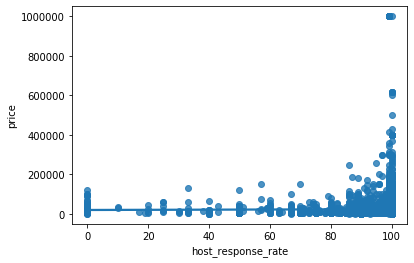

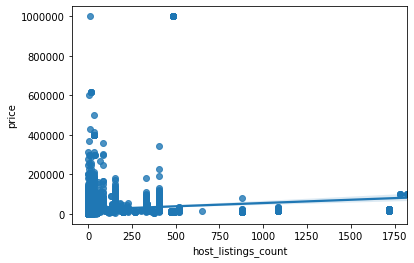

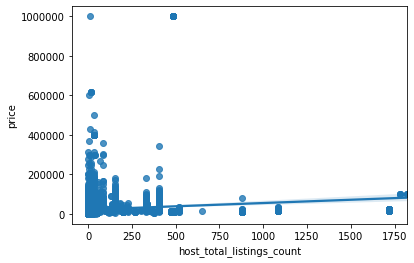

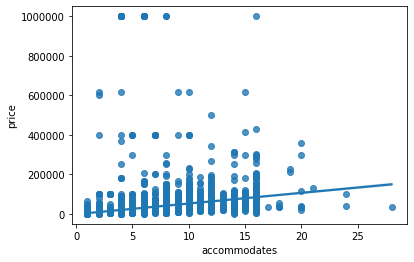

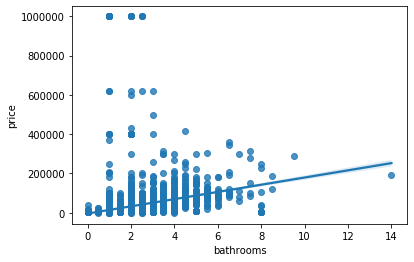

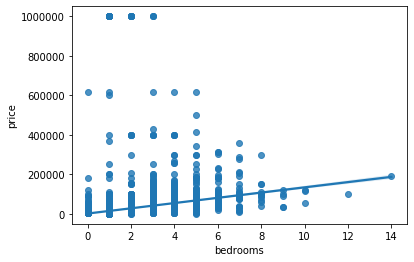

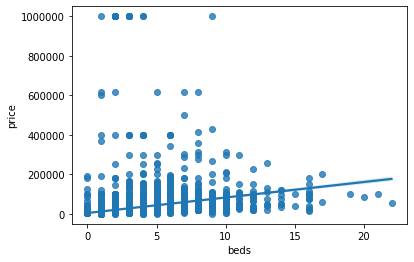

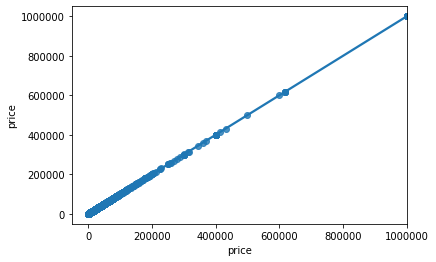

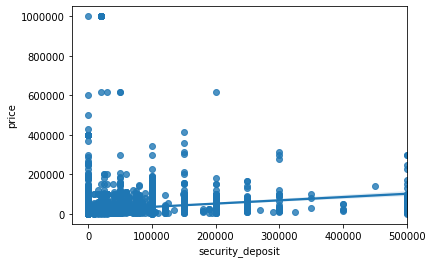

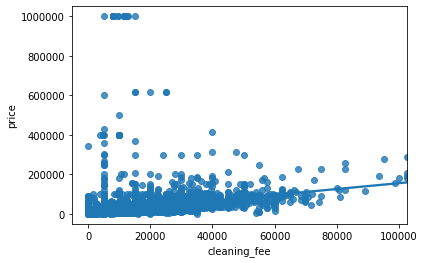

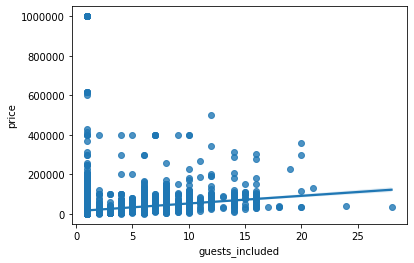

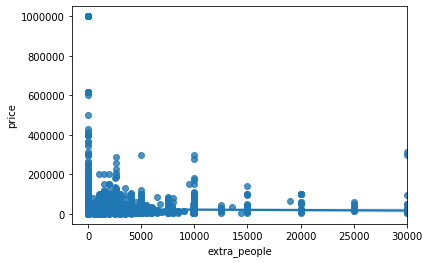

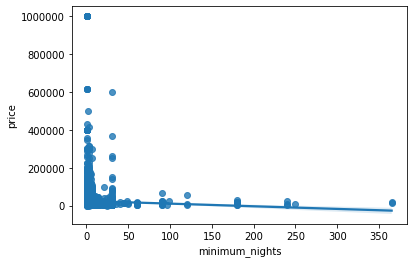

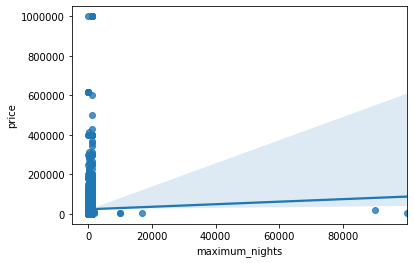

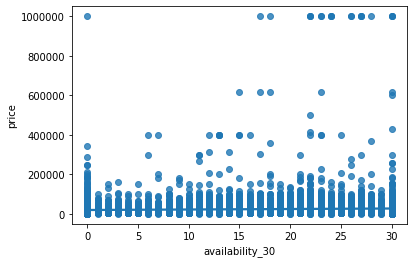

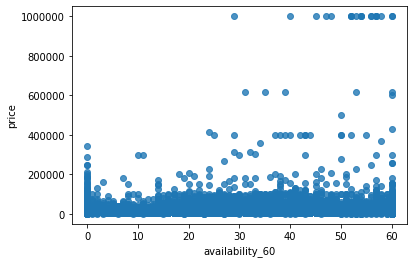

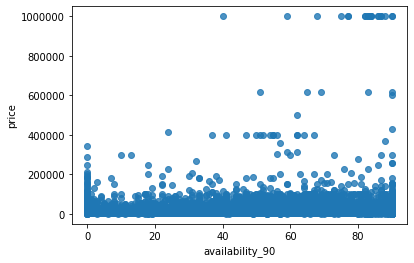

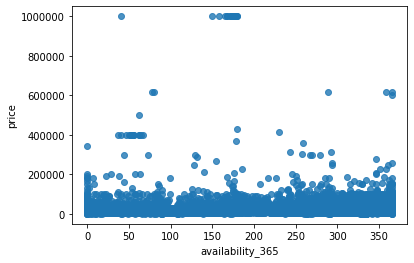

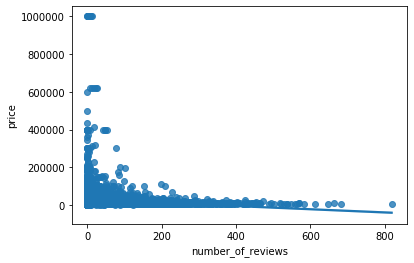

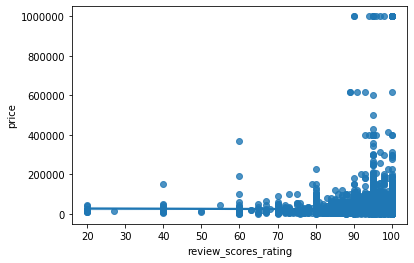

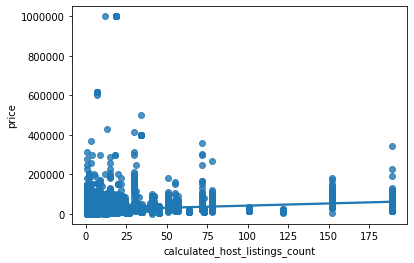

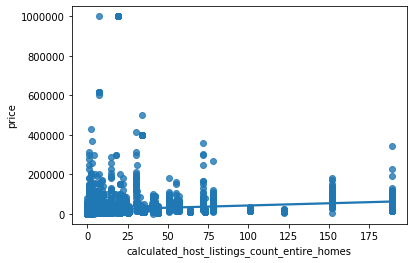

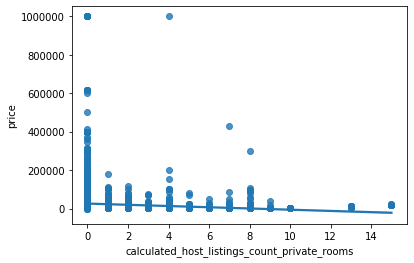

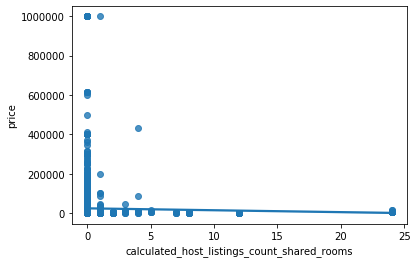

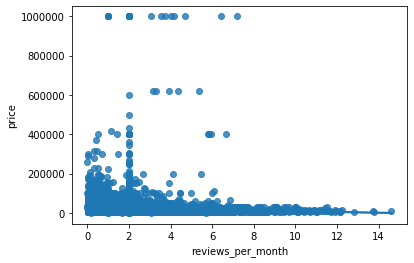

In [68]:
#plotting scatter plot 
for i in numeric_cols:
    plt.figure()
    sns.regplot(x = new_df[i], y= new_df['price'])

In [69]:
#building the linear regression model
from sklearn.model_selection import train_test_split

In [70]:
new_df.to_csv("Cleaned_Data_final.csv")

In [71]:
col_list=list(new_df.columns)
col_list.remove('price')
X=new_df[col_list]
y=new_df['price']
X = X.iloc[:,:]
y = y.iloc[:]

# Define train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20)

In [72]:
new_df.dtypes == object

host_response_rate              False
host_is_superhost               False
host_listings_count             False
host_total_listings_count       False
is_location_exact               False
                                ...  
San Diego, CA, United States    False
Santee                          False
Solana Beach                    False
Sugarloaf                       False
Tijuana                         False
Length: 68, dtype: bool

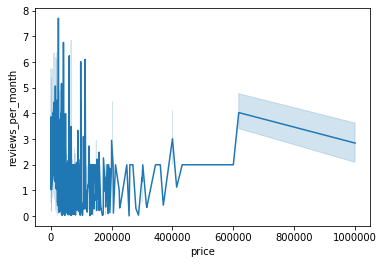

In [73]:
sns.lineplot(x=new_df['price'],y=new_df['reviews_per_month'])

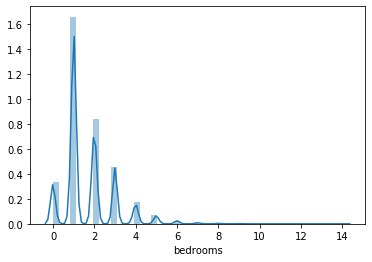

In [74]:
sns.distplot(new_df['bedrooms'])

In [75]:
from sklearn.preprocessing import StandardScaler
feature_scaler = StandardScaler()
X_train = feature_scaler.fit_transform(X_train)
X_test = feature_scaler.transform(X_test)

In [76]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [77]:
y_pred = regressor.predict(X_test)

In [78]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 13793.612584783992
Mean Squared Error: 2331523096.8377137
Root Mean Squared Error: 48285.84779040038


In [79]:
print('R2-score:', metrics.r2_score(y_test, y_pred))

R2-score: 0.16614222115864175


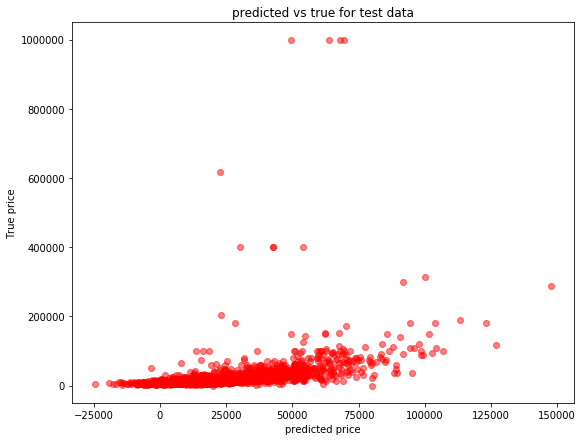

In [80]:
plt.figure(figsize=(9,7))
plt.scatter(y_pred, y_test, alpha=0.5, c='r')
plt.title('predicted vs true for test data')
plt.xlabel('predicted price')
plt.ylabel('True price')
#axes = plt.gca()
#axes.set_xlim([0,11000])
#axes.set_ylim([0,10000])
plt.show();

In [81]:
#Performing Linear Regression using Ridge
from sklearn. linear_model import Ridge
rid=Ridge(alpha=0.8)
rid.fit(X_train,y_train)
rid_pred=rid.predict(X_test)
print('R2-score:', metrics.r2_score(y_test, rid_pred))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, rid_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, rid_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, rid_pred)))

Ridge(alpha=0.8, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

R2-score: 0.1661745002637982
Mean Absolute Error: 13801.176469563088
Mean Squared Error: 2331432842.26298
Root Mean Squared Error: 48284.91319514802


In [82]:
#Performing Linear Regression using Lasso
from sklearn. linear_model import Lasso
lass=Lasso(alpha=0.9)
lass.fit(X_train,y_train)
lass_pred=rid.predict(X_test)
print('R2-score:', metrics.r2_score(y_test, lass_pred))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, lass_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, lass_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, lass_pred)))

C:\Users\Anish\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4345663669.0546875, tolerance: 2460044614.2135057
  positive)


Lasso(alpha=0.9, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

R2-score: 0.1661745002637982
Mean Absolute Error: 13801.176469563088
Mean Squared Error: 2331432842.26298
Root Mean Squared Error: 48284.91319514802


In [83]:
#Performing Linear Regression using ElasticNet
from sklearn. linear_model import ElasticNet
elastic=ElasticNet(alpha=0.7,l1_ratio=0.6)
elastic.fit(X_train,y_train)
elastic_pred=rid.predict(X_test)
print('R2-score:', metrics.r2_score(y_test, elastic_pred))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, elastic_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, elastic_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, elastic_pred)))

ElasticNet(alpha=0.7, copy_X=True, fit_intercept=True, l1_ratio=0.6,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

R2-score: 0.1661745002637982
Mean Absolute Error: 13801.176469563088
Mean Squared Error: 2331432842.26298
Root Mean Squared Error: 48284.91319514802


In [84]:
#Performing Gradient Boosting Regressor to increase the accuracy
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

gr=GradientBoostingRegressor(learning_rate=0.3,n_estimators=200)
gr.fit(X_train,y_train)


GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.3, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=200,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [85]:
from sklearn.metrics import mean_squared_error, r2_score
model_score = gr.score(X_train,y_train)
# Have a look at R sq to give an idea of the fit ,
# Explained variance score: 1 is perfect prediction
print('R2 sq: %.2f',model_score)
y_predicted = gr.predict(X_test)

# The mean squared error
mse = mean_squared_error(y_test, y_predicted)
print("Mean squared error: %.2f"% mse)

# The root mean squared error
rmse = np.sqrt(mse)
print("Root Mean squared error: %.2f"% rmse)

# Explained variance score: 1 is perfect prediction
print('Test Variance score: %.2f' % r2_score(y_test, y_predicted))

R2 sq: %.2f 0.9480359916740219
Mean squared error: 595820164.12
Root Mean squared error: 24409.43
Test Variance score: 0.79


Text(0.5, 0, 'Actual')

Text(0, 0.5, 'Predicted')

Text(0.5, 1.0, 'True vs Predicted')

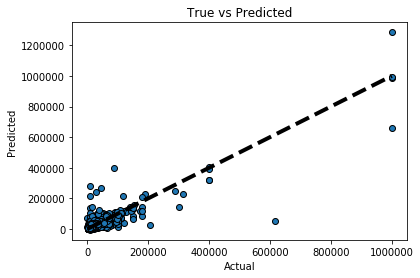

In [86]:
# So let's run the model against the test data
from sklearn.model_selection import cross_val_predict

fig, ax = plt.subplots()
ax.scatter(y_test, y_predicted, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("True vs Predicted")
plt.show()

In [87]:
#Building Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
from math import sqrt

rf=RandomForestRegressor(n_estimators=100)
rf.fit(X_train,y_train)

model_score = rf.score(X_train,y_train)
# Have a look at R sq to give an idea of the fit ,
# Explained variance score: 1 is perfect prediction
print('R2 sq: ',model_score)
rf_predicted = rf.predict(X_test)

# The mean squared error
x = mean_squared_error(y_test, rf_predicted)
print("Mean squared error: %.2f"% x)
print ("Root Mean squared error: %.2f"% sqrt(x))
# Explained variance score: 1 is perfect prediction
print("Test Variance score: %.2f" % r2_score(y_test, rf_predicted))

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

R2 sq:  0.9669233126052073
Mean squared error: 736781121.02
Root Mean squared error: 27143.71
Test Variance score: 0.74


Text(0.5, 0, 'Actual')

Text(0, 0.5, 'Predicted')

Text(0.5, 1.0, 'True vs Predicted')

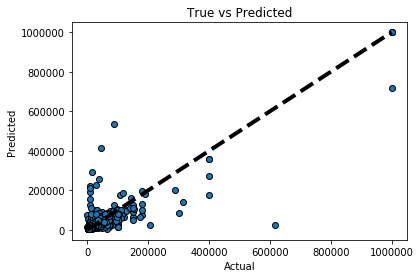

In [88]:
# So let's run the model against the test data

fig, ax = plt.subplots()
ax.scatter(y_test, rf_predicted, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("True vs Predicted")
plt.show()

In [89]:
from xgboost import XGBRegressor
xgb=XGBRegressor(n_estimators=200,learning_rate=0.3,max_depth=6)
xgb.fit(X_train,y_train)
xgb_pred=xgb.predict(X_test)
mse = mean_squared_error(y_test, xgb_pred)
print("Mean squared error: %.2f"% mse)
print ("Root Mean squared error: %.2f"% sqrt(mse))
# Explained variance score: 1 is perfect prediction
print("Test Variance score: %.2f" % r2_score(y_test, xgb_pred))

[01:42:12] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.3, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=None, n_estimators=200,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

Mean squared error: 606409878.48
Root Mean squared error: 24625.39
Test Variance score: 0.78


Text(0.5, 0, 'Actual')

Text(0, 0.5, 'Predicted')

Text(0.5, 1.0, 'True vs Predicted')

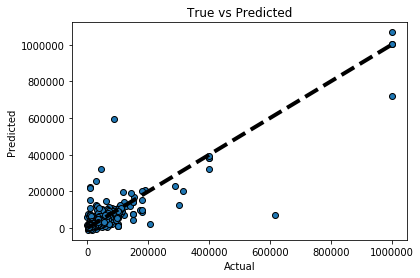

In [90]:
# So let's run the model against the test data

fig, ax = plt.subplots()
ax.scatter(y_test, xgb_pred, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("True vs Predicted")
plt.show()

# Using Cross Validation and Grid Search for the best model and parameter tuning

In [91]:
rfr = RandomForestRegressor(n_estimators=300,max_depth=6)

In [92]:
from sklearn.model_selection import cross_val_score
all_accuracies = cross_val_score(estimator=rfr, X=X_train, y=y_train, cv=5)

In [93]:
print(all_accuracies)

[0.648384   0.77761424 0.75887921 0.70126007 0.8017659 ]


In [94]:
print(all_accuracies.mean())


0.7375806834439184


In [95]:
#Variance
print(all_accuracies.std())

0.05559008912797371


In [96]:
from sklearn.model_selection import GridSearchCV

In [97]:
grid_param = {
    'n_estimators': [100, 300, 500, 800, 1000],
    'min_impurity_decrease': [0.1, 0.01, 0.0],
    'max_depth':[6,7,8],
    'criterion': ['mse'],
    'bootstrap': [True],
    
    
}

In [98]:
rf = RandomForestRegressor()
# Instantiate the grid search model
gd_sr = GridSearchCV(estimator=rf,
                     param_grid=grid_param,
                     scoring='r2',
                     cv=5,
                     n_jobs=-1)

In [ ]:
gd_sr.fit(X_train, y_train)

In [ ]:
best_parameters = gd_sr.best_params_
print(best_parameters)

In [ ]:
test_pred_score = gd_sr.score(X_test, y_test)

In [ ]:
test_pred_score

In [ ]:
grid_param = {
    'n_estimators': [100, 300, 500, 800, 1000],
    'learning_rate:': [0.1, 0.01, 0.05],
    'max_depth': [4,5,6]
}

In [ ]:
xgb=XGBRegressor()
gd_sr = GridSearchCV(estimator=xgb,
                     param_grid=grid_param,
                     scoring='r2',
                     cv=5,
                     n_jobs=-1)


In [ ]:
gd_sr.fit(X_train, y_train)

In [ ]:
best_parameters = gd_sr.best_params_
print(best_parameters)

In [ ]:
test_pred_score = gd_sr.score(X_test, y_test)
test_pred_score

# Got the best R2 score using XGboost

In [ ]:
len(new_df.columns)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [ ]:
model= keras.Sequential([
keras.layers.Dense(68,input_dim=X_train.shape[1],kernel_initializer='normal',activation='relu'), 
keras.layers.Dense(68,kernel_initializer='normal',activation='relu'),
keras.layers.Dense(34,kernel_initializer='normal',activation='relu'),
keras.layers.Dense(1,kernel_initializer='normal',activation='linear'),
]
)

In [ ]:
model.compile(loss='mean_absolute_error', optimizer='adam',metrics=['mean_absolute_error'])

In [ ]:
model.fit(X_train,y_train,validation_split=0.3)

In [ ]:
prediction=model.predict(X_test)

In [ ]:
metrics.r2_score(y_test,prediction)

### We used different models like Linear models, Random Forest, Boosting and Neural Networks for our dataset. The model that we are most confident in is the XGBoost with cross validation and parameter tuning. We are confident that our model does not overfit and still give us great results.

